In [35]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

np.random.seed(seed=42)

df_train = pd.read_csv('data/dota2/features.csv.zip', index_col='match_id')
df_train.head()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,4,2,2,-52.0,2874,1,1796,0,51,0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,4,3,1,-5.0,2463,1,1974,0,63,1
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,4,3,1,13.0,2130,0,0,1830,0,63
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,4,2,0,27.0,1459,0,1920,2047,50,63
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,3,3,0,-16.0,2449,0,4,1974,3,63


In [36]:
df_test = pd.read_csv('data/dota2/features_test.csv.zip', index_col='match_id')
df_test.head()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
match_id,,,,,,,,,,,,,,,,,,,,,
6,1430287923,0,93,4,1103,1089,8,0,1,9,...,0,12.0,247.0,-86.0,272.0,3,4,2,0,118.0
7,1430293357,1,20,2,556,570,1,0,0,9,...,2,-29.0,168.0,-54.0,NaN,3,2,2,1,16.0
10,1430301774,1,112,2,751,808,1,0,0,13,...,1,-22.0,46.0,-87.0,186.0,1,3,3,0,-34.0
13,1430323933,1,27,3,708,903,1,1,1,11,...,2,-49.0,30.0,-89.0,210.0,3,4,2,1,-26.0
16,1430331112,1,39,4,1259,661,4,0,0,9,...,0,36.0,180.0,-86.0,180.0,1,3,2,1,-33.0


In [37]:
X_train = df_train.drop("duration",1).drop("radiant_win",1).drop("tower_status_radiant",1).drop("tower_status_dire",1).drop("barracks_status_radiant",1).drop("barracks_status_dire",1)

X_train.head()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,0,35.0,103.0,-84.0,221.0,3,4,2,2,-52.0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,0,-20.0,149.0,-84.0,195.0,5,4,3,1,-5.0
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,1,-39.0,45.0,-77.0,221.0,3,4,3,1,13.0
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,0,-30.0,124.0,-80.0,184.0,0,4,2,0,27.0
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,0,46.0,182.0,-80.0,225.0,6,3,3,0,-16.0


In [38]:
for i in pd.isna(df_train).sum().items():
    if(i[1] > 0):
        print(i) 

('first_blood_time', 19553)
('first_blood_team', 19553)
('first_blood_player1', 19553)
('first_blood_player2', 43987)
('radiant_bottle_time', 15691)
('radiant_courier_time', 692)
('radiant_flying_courier_time', 27479)
('radiant_first_ward_time', 1836)
('dire_bottle_time', 16143)
('dire_courier_time', 676)
('dire_flying_courier_time', 26098)
('dire_first_ward_time', 1826)


In [39]:
X_train = X_train.fillna(0)
X_test = df_test.fillna(0)

In [40]:
# Целевая переменная
y_train = df_train['radiant_win']

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
import time
import datetime
import numpy as np
from sklearn.metrics import roc_auc_score

cv = KFold(n_splits=5, shuffle=True, random_state=42)

scores = []
# Кол-ва деревьев для модели
nums = [10, 20, 30, 45, 90, 210]

for n in nums:
    print('Trees: ', str(n))
    model = GradientBoostingClassifier(n_estimators=n, random_state=42)
    start_time = datetime.datetime.now()
    model_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
    print('Time spent:', datetime.datetime.now() - start_time)
    print(model_scores)
    scores.append(np.mean(model_scores))


Trees:  10
Time spent: 0:00:27.816507
[0.66383799 0.66635457 0.66360048 0.66529818 0.66516222]
Trees:  20
Time spent: 0:00:50.313024
[0.68083889 0.68272733 0.67969876 0.6834932  0.6855512 ]
Trees:  30
Time spent: 0:01:13.743760
[0.68892093 0.68934663 0.68712298 0.69180598 0.69283583]
Trees:  45
Time spent: 0:01:49.769999
[0.6948171  0.69558113 0.69321138 0.69771267 0.69809312]
Trees:  90
Time spent: 0:04:14.184591
[0.70428355 0.70489618 0.70314489 0.70636257 0.70710108]
Trees:  210
Time spent: 0:08:52.227759
[0.71280325 0.71332323 0.71319499 0.71585593 0.71541683]


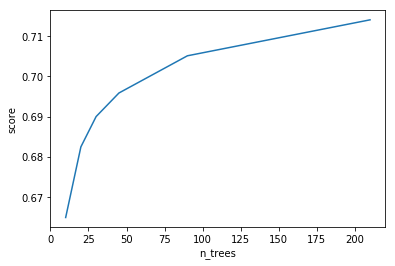

In [44]:
from matplotlib import pyplot as plt

plt.plot(nums, scores)
plt.xlabel('n_trees')
plt.ylabel('score')
plt.show()